<a href="https://colab.research.google.com/github/ysamokhotov/yandex-praktikum-projects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82-%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from google.colab import drive
import pylab

## Предобработка

In [2]:
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/games.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# найдем пропуски
numbers_of_nulls = pd.DataFrame(columns=['names'], data=df.columns)
numbers_of_nulls['nulls'] = df.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/df.shape[0]
numbers_of_nulls

,names,nulls,nulls_percent
0,name,2,0.011965
1,platform,0,0.000000
2,year_of_release,269,1.609333
3,genre,2,0.011965
4,na_sales,0,0.000000
5,eu_sales,0,0.000000
6,jp_sales,0,0.000000
7,other_sales,0,0.000000
8,critic_score,8578,51.319174
9,user_score,6701,40.089740


In [8]:
# заменим категориальные переменные - пропущенные возрастные категории (rating) на unknown
df.rating.fillna('unknown', inplace=True)

In [9]:
# удалим пропуски
df.dropna(subset = ['name' , 'genre', 'year_of_release'], inplace=True)

In [10]:
# приведем значения в колонке year_of_release к целому числу для удобства использования
df['year_of_release'] = df['year_of_release'].astype('int64')

In [11]:
# удаляем строку с игрой на DS от 1985г., т.к. платформа вышла гораздо позже, значит это ошибка
df.drop(df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)].index, axis=0, inplace=True)

In [12]:
# в столбце user_score хранится значение 'tbd', поскольку у нас нет информации о том, что это означает, заменим его на NaN и сразу переведем все значения столбца к вещественным числам
df['user_score'].unique()
df['user_score'].replace('tbd', np.NaN, inplace=True)
df['user_score'] = df['user_score'].astype(float)

In [13]:
print('Доля пропусков в user_score & critic_score от общего количества пропусков в user_score:',
df[df['critic_score'].isnull() & df['user_score'].isnull()].shape[0] / (df['user_score'].isnull() * 1).sum())

Доля пропусков в user_score & critic_score от общего количества пропусков в user_score: 0.8787305122494432


In [14]:
print('Доля пропусков в user_score & critic_score от общего количества пропусков в critic_score:',
df[df['critic_score'].isnull() & df['user_score'].isnull()].shape[0] / (df['critic_score'].isnull() * 1).sum())

Доля пропусков в user_score & critic_score от общего количества пропусков в critic_score: 0.93274231678487


*Наличие пропусков в колонках взаимосвязано.*

In [15]:
def correlation_hist(column):
    plt.figure(figsize=(12, 7))
    plt.hist(df[df['critic_score'].isnull() & df['user_score'].isnull()][column])
    plt.title('Взаимосвязь пропусков')
    plt.ylabel('Количество пропусков')
    plt.xlabel(f'Критерий: {column}')
    plt.xticks(rotation=45)
    plt.show()    

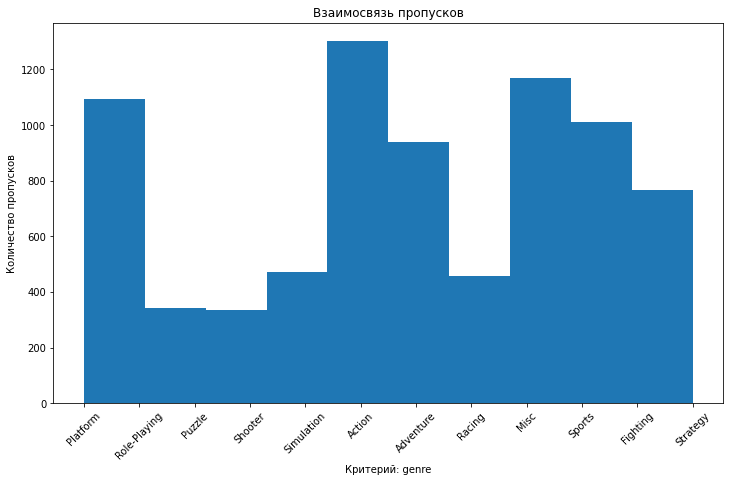

In [16]:
correlation_hist('genre')

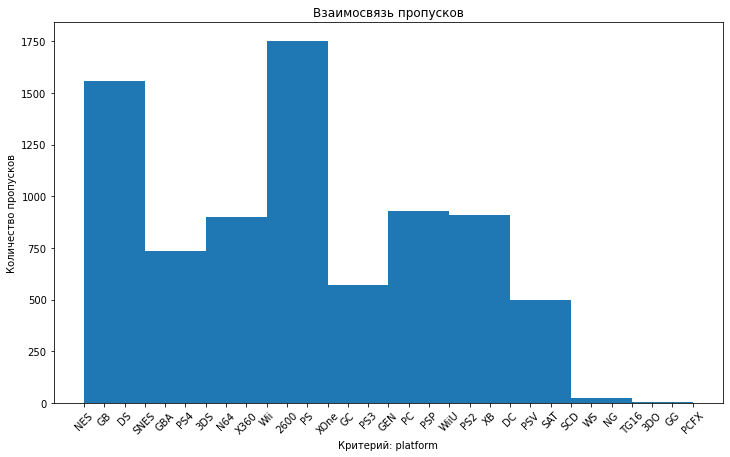

In [17]:
correlation_hist('platform')

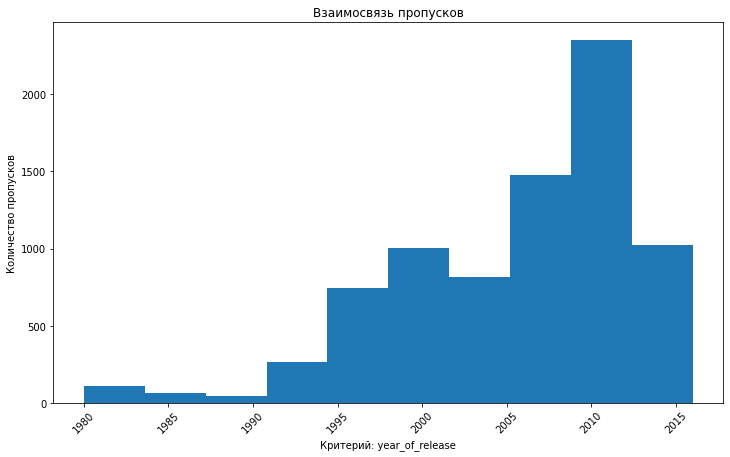

In [18]:
correlation_hist('year_of_release')

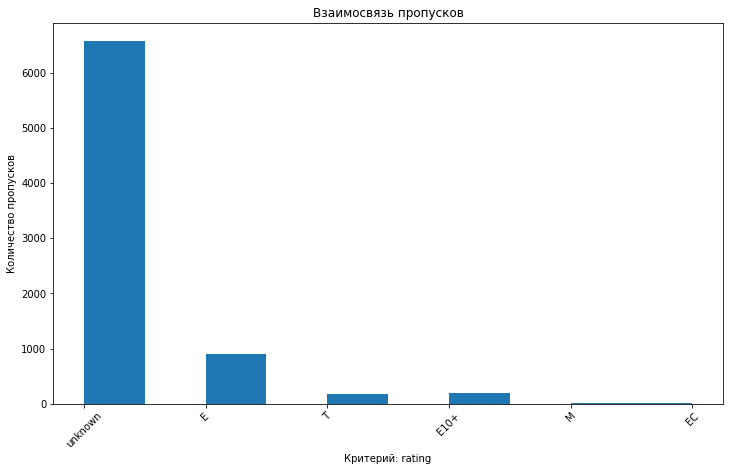

In [19]:
correlation_hist('rating')

*Однозначно утверждать о наличии какой-либо взаимосвязи между пропусками и различными категориальными переменными мы не можем, поэтому принимаем гипотезу пропуска данных missing completely at random (MCAR), удалять пропуски не будем.*

In [20]:
# проверим наличие явных дубликатов
df.duplicated().sum()

0

In [21]:
# просуммируем все продажи по каждой игре в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ

### Посмотрим количество выпущенных игр по годам

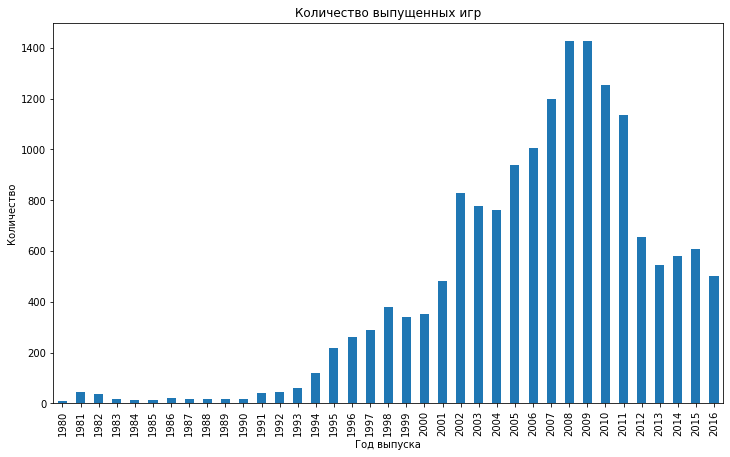

In [22]:
df.groupby('year_of_release')['total_sales'].agg('count').plot(
    kind='bar', figsize=(12,7), title = 'Количество выпущенных игр', xlabel='Год выпуска', ylabel='Количество')
plt.show()

*На графике видно как поступательно развивалась игровая индустрия, отметим прогрессию количества релизов до 2009г, после чего количество релизов снижается.*

### Посмотрим изменение продаж по платформам, для платформ с наибольшими суммарными продажами построим распределение по годам и определим за какой характерный срок появляются новые / исчезают старые платформы

In [23]:
# сделаем сводную
total_sales_by_platform_and_release = df.groupby(
    ['year_of_release', 'platform'])['total_sales'].agg('sum').reset_index()
total_sales_by_platform_and_release.head()

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  after removing the cwd from sys.path.


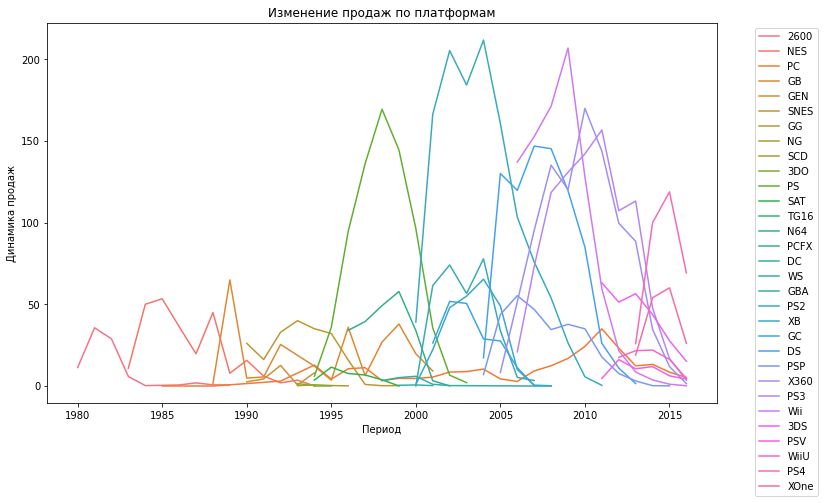

In [24]:
# визуализируем как менялись продажи по всем платформам за весь представленный период
plt.figure(figsize=(12, 7))
sns.lineplot(x='year_of_release', y='total_sales', data=total_sales_by_platform_and_release[
    (total_sales_by_platform_and_release.year_of_release.between(1980,2016, inclusive = True))], hue='platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Изменение продаж по платформам')
plt.ylabel('Динамика продаж')
plt.xlabel('Период')
plt.show()

*График получился не очень читаемый ввиду большого количества представленных платформ, сгруппируем платформы по уровню продаж и построим отдельные графики для каждой группы*

In [25]:
total_sales_by_platform = df.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
top1_sales = list(total_sales_by_platform.platform[:5])
top2_sales = list(total_sales_by_platform.platform[6:11])
top3_sales = list(total_sales_by_platform.platform[12:17])
top4_sales = list(total_sales_by_platform.platform[18:23])
top5_sales = list(total_sales_by_platform.platform[24:])

In [26]:
# сделаем функцию для получения графика для каждой sales category
def get_plot_sales_to_release (sales_category):
    plt.figure(figsize=(12, 7))
    sns.lineplot(x='year_of_release', y='total_sales', data=total_sales_by_platform_and_release[
        (total_sales_by_platform_and_release.year_of_release.between(1980,2016, inclusive = True)) & (
            total_sales_by_platform_and_release.platform.isin(sales_category))], hue='platform')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Уровень продаж по платформам', fontsize=12)
    plt.ylabel('Динамика продаж')
    plt.xlabel('Период')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """


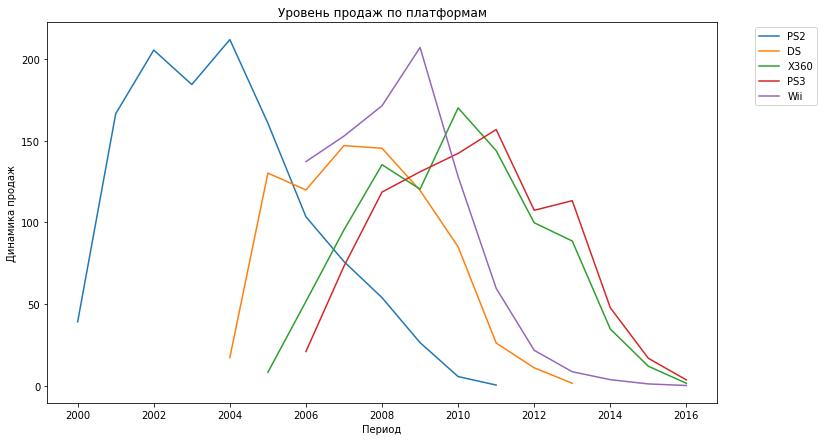

In [27]:
get_plot_sales_to_release(top1_sales)

*Графики для каждой платформы похожи и различаются в большей степени по своему периоду популярности, актуальность каждой платформы составляет примерно 3-5 лет (срок от начала роста до начала падения релизов)*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """


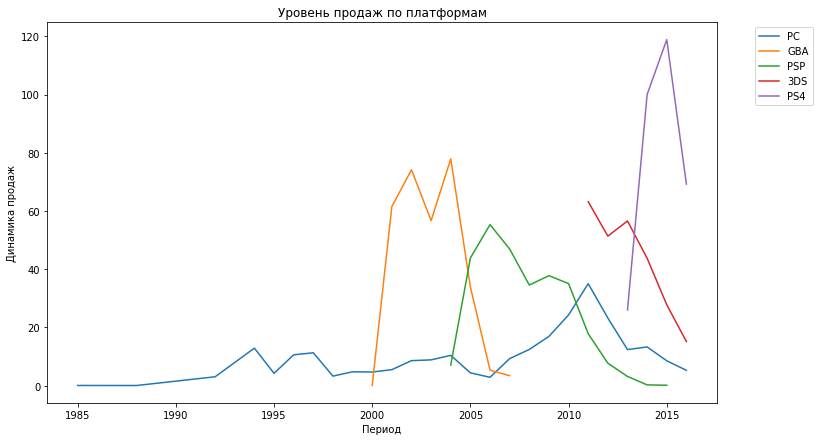

In [28]:
get_plot_sales_to_release(top2_sales)

*Здесь мы видим примерно тоже самое, но актуальность платформ немного меньше. Также стоит отметить, что РС остается примерно на одном уровне популярности весь период наблюдений*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """


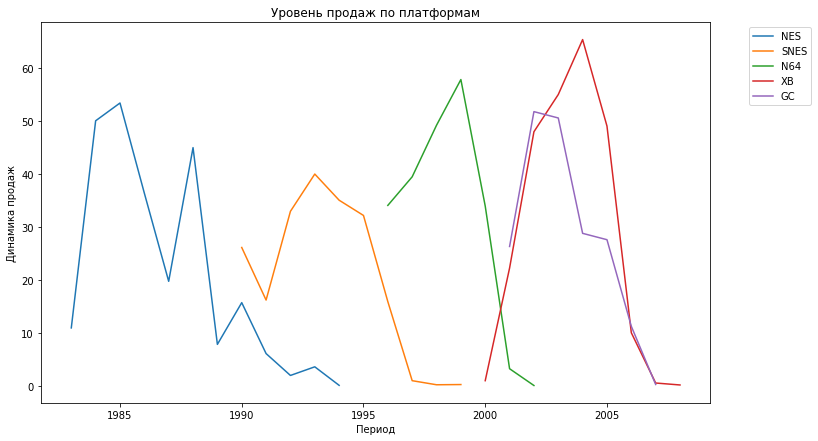

In [29]:
get_plot_sales_to_release(top3_sales)

*Здесь отметим, что в эту категорию вошли более старые платформы, также период актуальности платформ примерно такой же, как у категории 2. Также интересный факт, что пополярность платформы GB отображается скачкообразно*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """


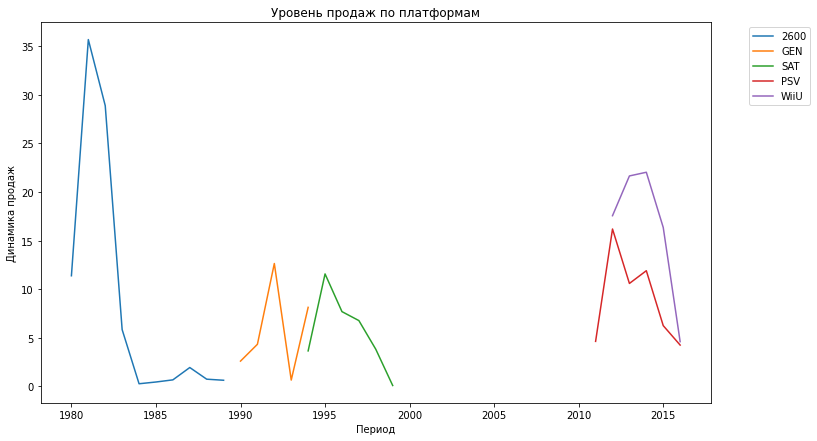

In [30]:
get_plot_sales_to_release(top4_sales)

*В эту категорию попали платформы из разных эпох. но их схожесть в периоде актуальности, он составляет примерно 2-3 года до момента снижения количества релизов*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """


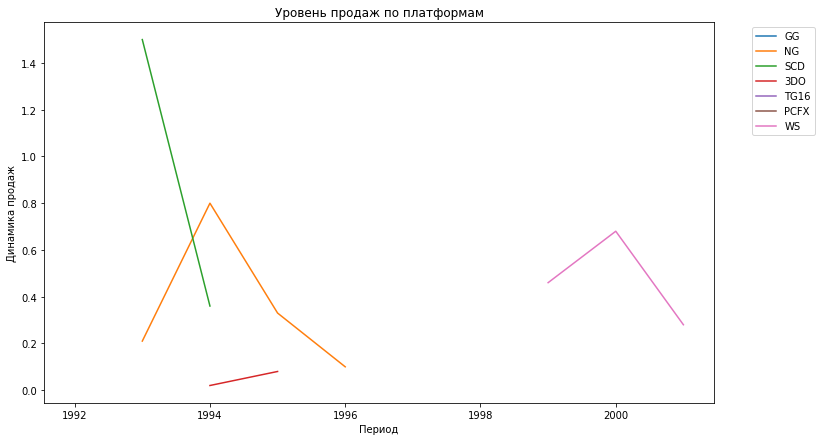

In [31]:
get_plot_sales_to_release(top5_sales)

*В самой низшей категории сложно что-то проанализировать ввиду ограниченного количества данных*

### Определим актуальный период для дальнейшего анализа с целью построить прогноз на 2017 год

В качестве актуального периода будем использовать 2013-2016, поскольку мы выяснили, что цикл актуальности платформы составляет от 3 до 5 лет.

### Проанализируем продажи в разрезе платформ за актуальный период

In [32]:
# отфильтруем актуальный период
actual_platforms = df[
    (df['year_of_release'].between(2013,2016, inclusive = True))].reset_index()

total_sales_by_actual_platforms = actual_platforms.groupby(
    'platform')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()

total_sales_by_actual_platforms.sort_values(by='total_sales', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


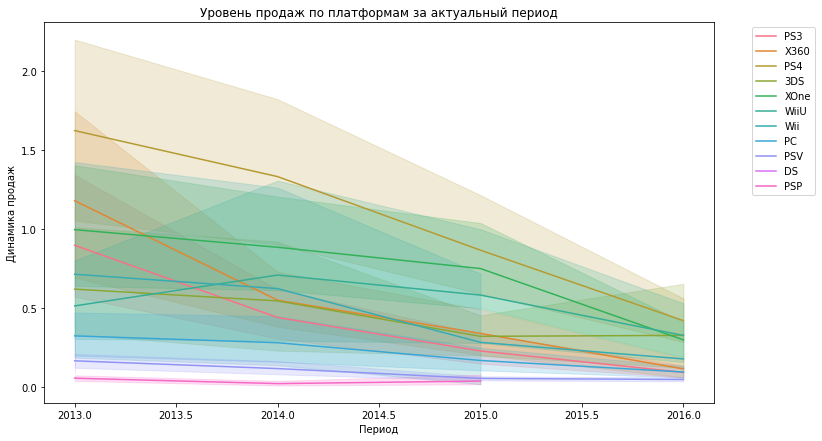

In [33]:
# построим линейный график по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(12, 7))
sns.lineplot(x='year_of_release', y='total_sales', data=actual_platforms, hue='platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Уровень продаж по платформам за актуальный период', fontsize=12)
plt.ylabel('Динамика продаж')
plt.xlabel('Период')
plt.show()

Выводы:

- лидером по продажам с 2013 года является PS4
- за 2016 также в топ-3 входят 3DS и XOne
- наблюдается тренд снижения продаж на всех платформах
- продажи для PSP закончились в 2015
- продажи для X360 и PS3 снижаются ввиду выхода новых платформ XOne и PS4 у Майкрософт и Сони соответственно
- продажи для 3DS равномерно снижались до 2015, после чего выровнялись
- лидеры по продажам за актуальный период подходят к концу своего цикла популярности и вскоре производители должны обновить модельный ряд. До выхода новых платформ в лидерах останутся платформы PS4, XOne

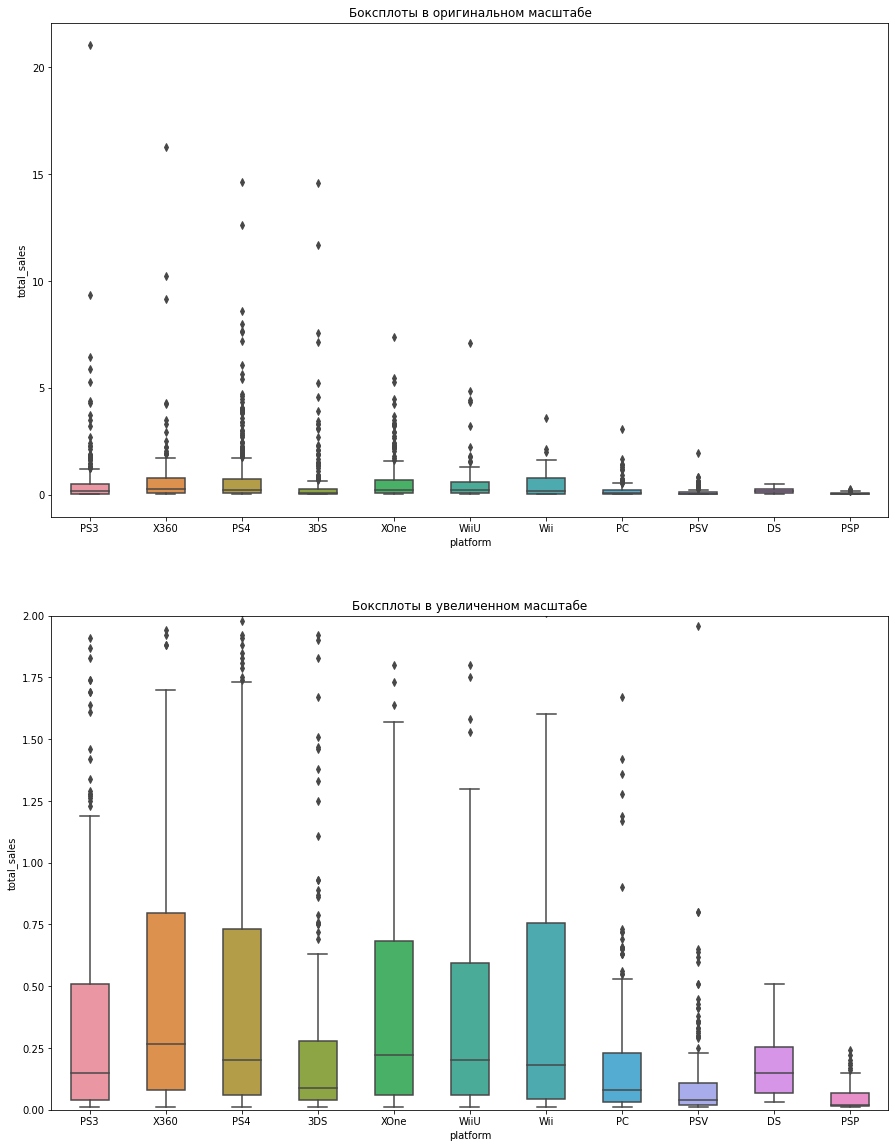

In [34]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
fig, axarr = plt.subplots(2, figsize=(15, 20))
sns.boxplot(x='platform', y='total_sales', data=actual_platforms, width = 0.5, ax=axarr[0])
sns.boxplot(x='platform', y='total_sales', data=actual_platforms, width = 0.5, ax=axarr[1])
axarr[1].set_ylim([0, 2])
axarr[0].set_title('Боксплоты в оригинальном масштабе')
axarr[1].set_title('Боксплоты в увеличенном масштабе')
plt.show()

Дополнительно сделаем отдельный боксплот для каждой платформы.

In [35]:
# создадим функцию для вывода боксплотов и дескрайба для каждой платформы
def get_boxplot (platform):
    data = actual_platforms[actual_platforms['platform'] == platform]
    print(data['total_sales'].describe())
    fig, axarr = plt.subplots(2, figsize=(9, 11))
    sns.boxplot(x='platform', y='total_sales', data=data, width = 0.1, ax=axarr[0])
    axarr[0].set_title('Боксплот в оригинальном масштабе')
    sns.boxplot(x='platform', y='total_sales', data=data, width = 0.1, ax=axarr[1])
    axarr[1].set_title('Боксплот в увеличенном масштабе')
    axarr[1].set_ylim([0, 2])

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


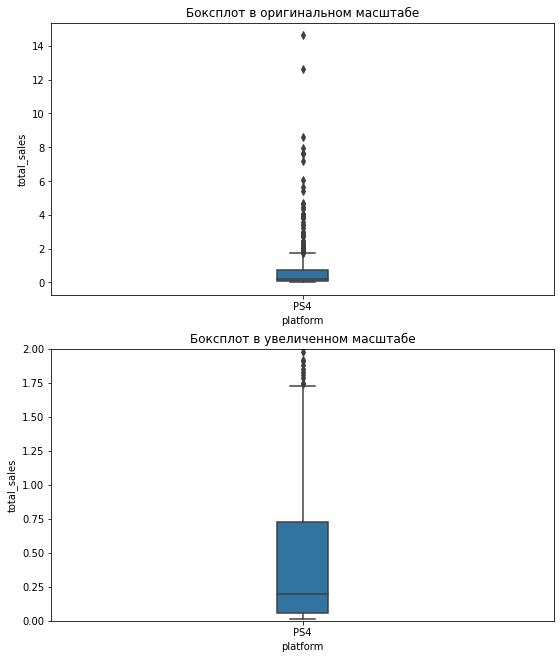

In [36]:
get_boxplot('PS4')

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64


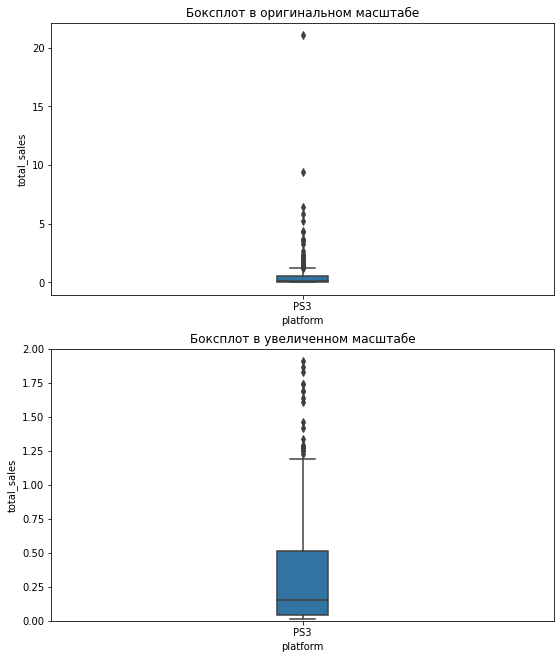

In [37]:
get_boxplot('PS3')

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64


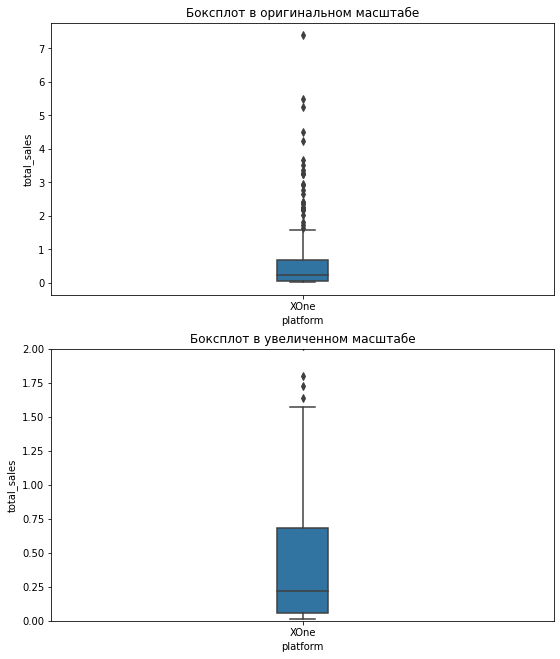

In [38]:
get_boxplot('XOne')

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64


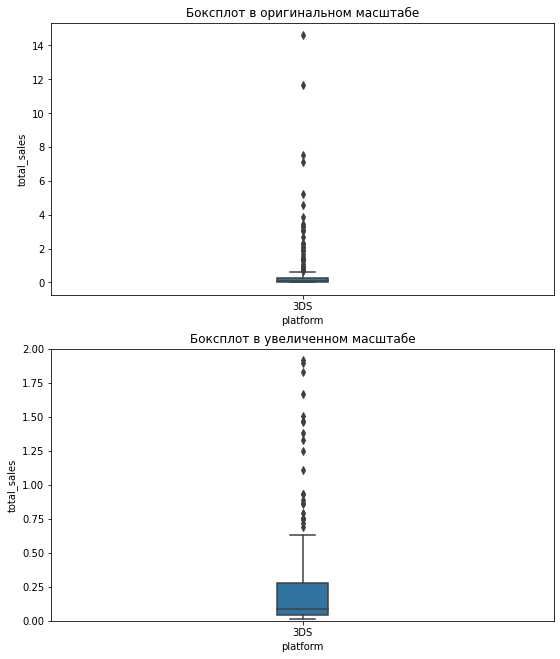

In [39]:
get_boxplot('3DS')

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64


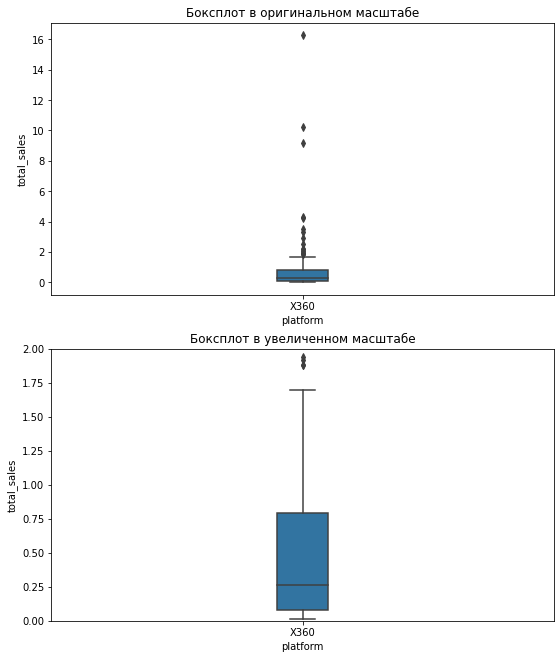

In [40]:
get_boxplot('X360')

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64


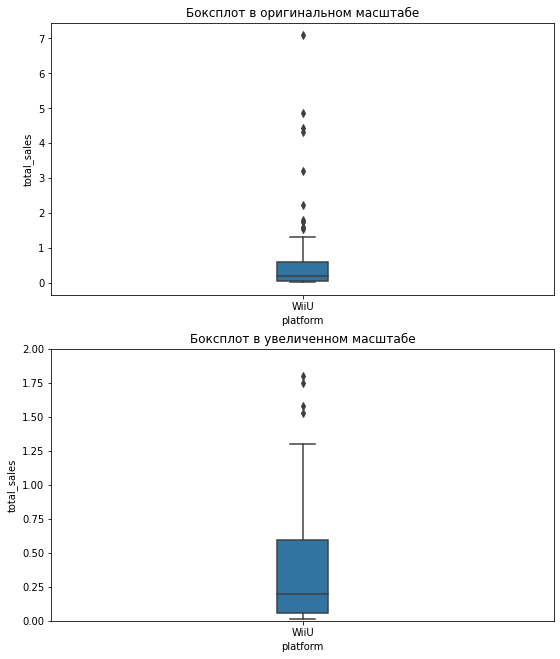

In [41]:
get_boxplot('WiiU')

count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: total_sales, dtype: float64


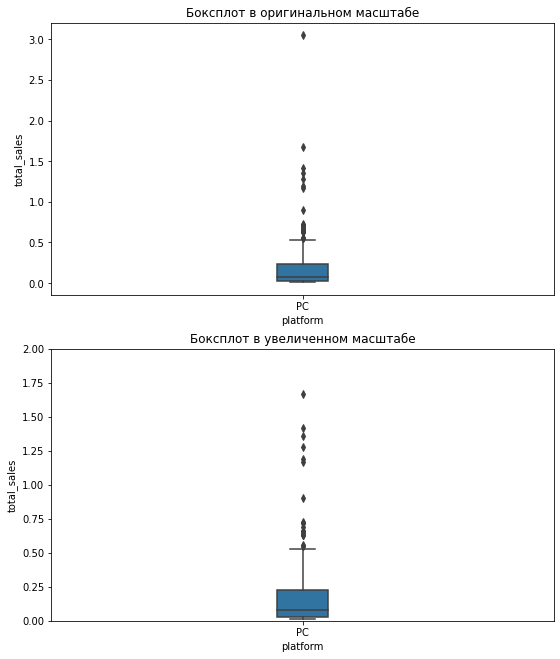

In [42]:
get_boxplot('PC')

count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: total_sales, dtype: float64


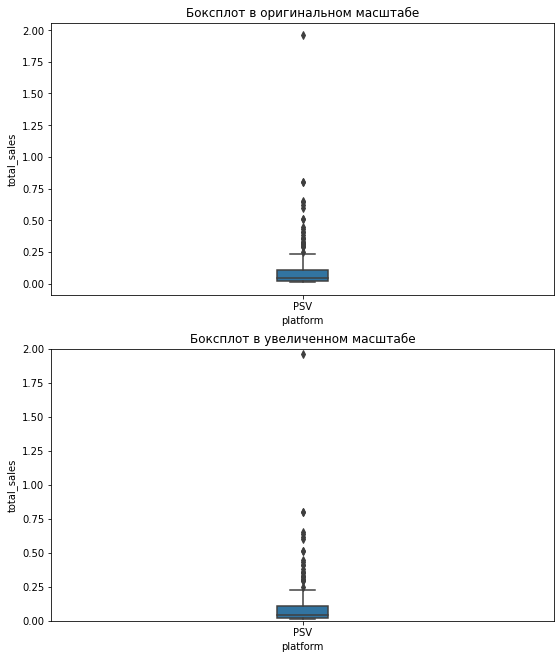

In [43]:
get_boxplot('PSV')

count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: total_sales, dtype: float64


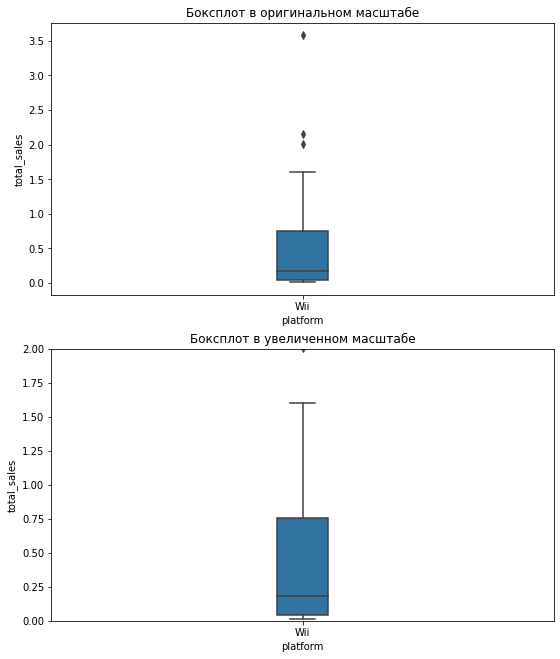

In [44]:
get_boxplot('Wii')

count    67.000000
mean      0.052239
std       0.059768
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: total_sales, dtype: float64


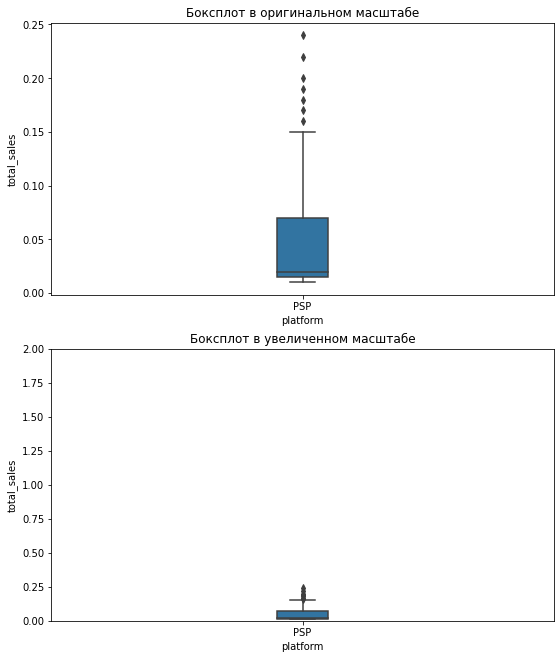

In [45]:
get_boxplot('PSP')

count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: total_sales, dtype: float64


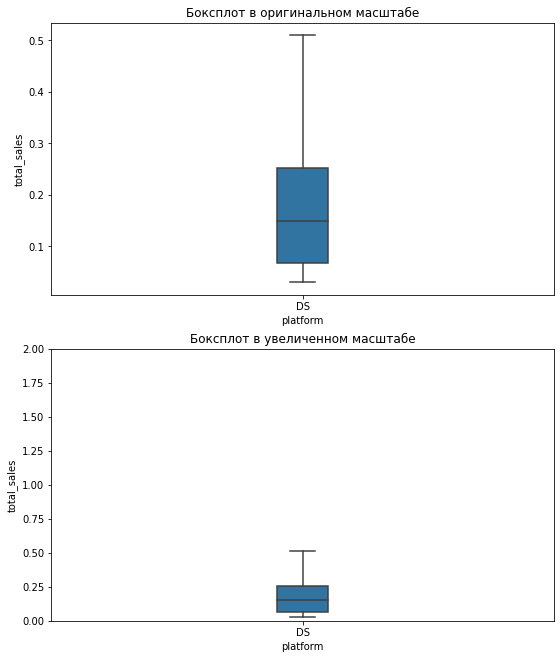

In [46]:
get_boxplot('DS')

Выводы:

- рекордсменом по продажам является игра Wii Sports на платформе Wii, принесшая более 82млн
- видим, что есть отдельные игры, которые приносят бОльшую прибыль на каждой платформе
- игры на РС выходят большим тиражом, но приносят меньше прибыли в сравнении с играми на приставках, выпущенными аналогичным тиражом
- средняя выручка с игры на PS4: 800тыс, максимальная: 14,6млн
- средняя выручка с игры на PS3: 700тыс, максимальная: 21млн
- средняя выручка с игры на XOne: 640тыс, максимальная: 7.4млн
- средняя выручка с игры на 3DS: 500тыс, максимальная: 14.6млн
- средняя выручка с игры на X360: 770тыс, максимальная: 21.8млн
- средняя выручка с игры на WiiU: 560тыс, максимальная: 7млн
- средняя выручка с игры на PC: 270тыс, максимальная: 8млн
- средняя выручка с игры на PSV: 130тыс, максимальная: 2млн
- средняя выручка с игры на Wii: 690тыс, максимальная: 82.5млн
- средняя выручка с игры на PSP: 240тыс, максимальная: 7.7млн
- средняя выручка с игры на DS: 370тыс, максимальная: 29.8млн
- 2/8 платформ имеют доходность с 99% игр менее 500тыс, остальные больше этого порога, лучшие по этому показателю: PS3 и PS4, но у PS4 значительно меньший тираж, ввиду этого, делаем вывод, что доходность с каждой игры там выше

### Посмотрим на влияние на продажи отзывов пользователей и критиков внутри одной популярной платформы с помощью графика разброса и корреляции

In [47]:
def get_scatter(platfrom, user_or_critic):
    plt.scatter(actual_platforms[actual_platforms.platform == platfrom][user_or_critic], actual_platforms[actual_platforms.platform == platfrom].total_sales, alpha=0.2)
    plt.title(f'Отношение {user_or_critic} к уровню продаж для {platfrom}')
    plt.xlabel(f'{user_or_critic}')
    plt.ylabel('Уровень продаж')
    plt.show()

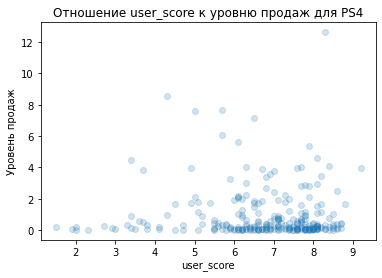

In [48]:
get_scatter('PS4', 'user_score')

*На диаграмме прямой зависимости продаж от оценки не заметно, основная часть игр оценивается в 6-8 баллов, при этом их уровень продаж не отличается*

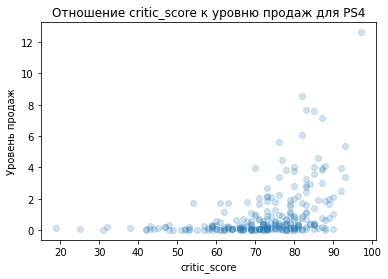

In [49]:
get_scatter('PS4', 'critic_score')

*Здесь ситуация аналогичная, большинство игр оценивается в 60-80 баллов, но их уровень продаж не отличается*

In [50]:
def get_corr(platform, user_or_critic):
    return actual_platforms[actual_platforms.platform == platform][
                [user_or_critic, 'total_sales']].corr()

In [51]:
get_corr('PS4', 'user_score')

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


*Связи нет*

In [52]:
get_corr('PS4', 'critic_score')

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


*Наблюдаем слабую связь*

In [53]:
# проверим также зависимость на гистограмме, разбив колонки с оценками на бины
actual_platforms['user_score_bin'] = pd.cut(actual_platforms['user_score'], 10)
actual_platforms['critic_score_bin'] = pd.cut(actual_platforms['critic_score'], 10)

In [54]:
actual_platforms['critic_score_bin'].value_counts()

(71.8, 80.2]      322
(80.2, 88.6]      215
(63.4, 71.8]      203
(55.0, 63.4]      103
(46.6, 55.0]       52
(88.6, 97.0]       47
(38.2, 46.6]       28
(29.8, 38.2]       14
(12.916, 21.4]      4
(21.4, 29.8]        3
Name: critic_score_bin, dtype: int64

In [55]:
actual_platforms['user_score_bin'].value_counts()

(7.48, 8.39]     320
(6.57, 7.48]     286
(5.66, 6.57]     204
(4.75, 5.66]     107
(8.39, 9.3]      106
(3.84, 4.75]      71
(2.93, 3.84]      60
(2.02, 2.93]      22
(1.11, 2.02]      13
(0.191, 1.11]      3
Name: user_score_bin, dtype: int64

In [56]:
def get_lineplot(platform, bin):
    actual_platforms[actual_platforms['platform'] == platform].groupby(
        bin)['total_sales'].median().plot(rot=45, ylim=0, grid=True, xlabel=bin, ylabel='Уровень продаж')
    plt.title(f'Зависимость уровня продаж от оценки {bin}')
    plt.show()

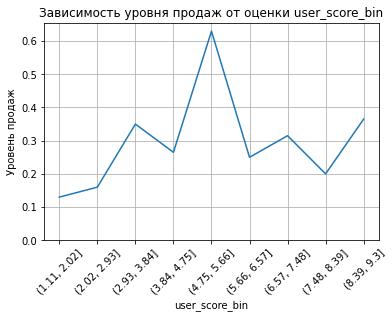

In [57]:
get_lineplot('PS4', 'user_score_bin')

*Лучше всего продаются игры со средним пользовательским рейтингом, прямой зависимости не прослеживается*

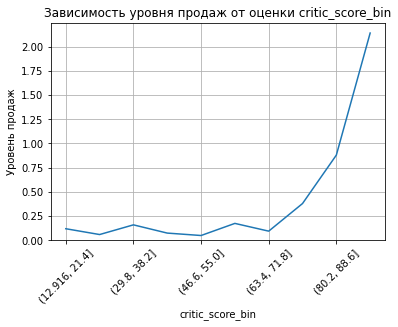

In [58]:
get_lineplot('PS4', 'critic_score_bin')

*На данном графике отмечаем зависимость продаж от рейтинга критиков, но она начинает проявляться только с высокорейтинговых игр*

Резюмируя, мы увидели прямую зависимость уровня продаж от оценок критиков, но данная зависимость проявляется только с высокорейтинговыми играми - можно сказать, что рост продаж начинается с оценок от 63. Что касается зависимости продаж от рейтинга игроков, то здесь прямой зависимости не прослеживается.

### Соотнесем выводы с продажами игр на других платформах

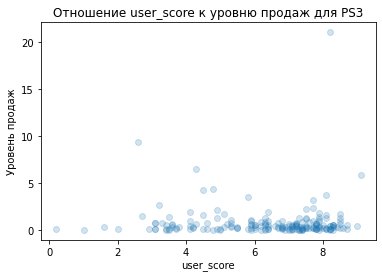

In [59]:
# по аналогичной схеме построим и проанализируем графики для PS3
get_scatter('PS3', 'user_score')

*Здесь ситуация аналогичная PS4, большинство игр оценивается в 6-8 баллов, но их уровень продаж между собой значительно не отличается*

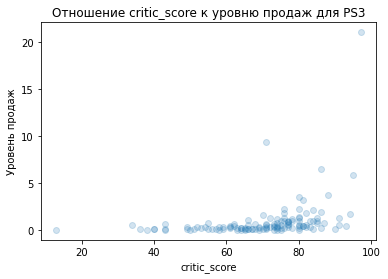

In [60]:
get_scatter('PS3', 'critic_score')

*Здесь тенденция аналогичная с предыдущим графиком, большинство игр оценивается в 60-80 баллов, но их уровень продаж между собой значительно не отличается*

In [61]:
get_corr('PS3', 'user_score')

,user_score,total_sales
user_score,1.000000,0.002394
total_sales,0.002394,1.000000


*Связи нет*

In [62]:
get_corr('PS3', 'critic_score')

,critic_score,total_sales
critic_score,1.000000,0.334285
total_sales,0.334285,1.000000


*Наблюдаем слабую связь*

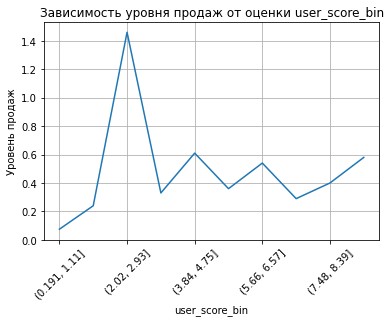

In [63]:
get_lineplot('PS3', 'user_score_bin')

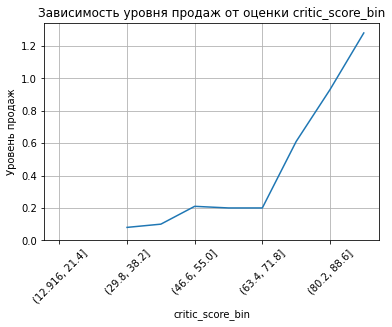

In [64]:
get_lineplot('PS3', 'critic_score_bin')

*По PS3 в целом можно сделать аналогичные выводы, как и по PS4. На гистограмме завиимости продаж от оценок пользователей нет прямой зависимости. Зависимость от оценок критиков начинает прослеживаться примерно с 63 баллов, т.е. можно утверждать, что такая зависимость есть только в случае с высокорейтинговыми играми*

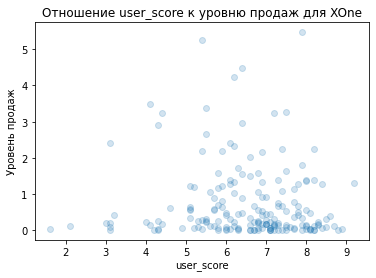

In [65]:
# теперь посмотрим на XOne
get_scatter('XOne', 'user_score')

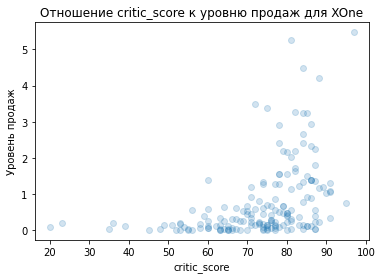

In [66]:
get_scatter('XOne', 'critic_score')

*Отметим больший разброс, чем по предыдущим платформам*

In [67]:
get_corr('XOne', 'user_score')

,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


*Связи нет*

In [68]:
get_corr('XOne', 'critic_score')

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


*Наблюдаем слабую связь*

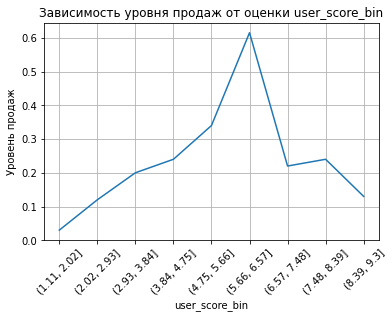

In [69]:
get_lineplot('XOne', 'user_score_bin')

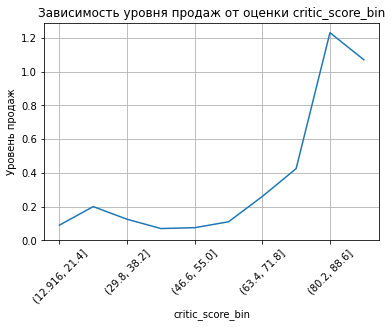

In [70]:
get_lineplot('XOne', 'critic_score_bin')

*На гистограмме отношения оценки критиков и уровня продаж также видно, что прямая зависимость начинает проявляться в случае высокорейтинговых игр. Отметим, что оценка пользователей в этом случае также не выражает логичную зависимость - при более высоком рейтинге, лучшие продажи. Здесь лучше продавались игры со средним рейтингом.* 

### Посмотрим на общее распределение игр по жанрам и сделаем выводы относительно самых прибыльных жанров.

In [71]:
actual_platforms.genre.value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

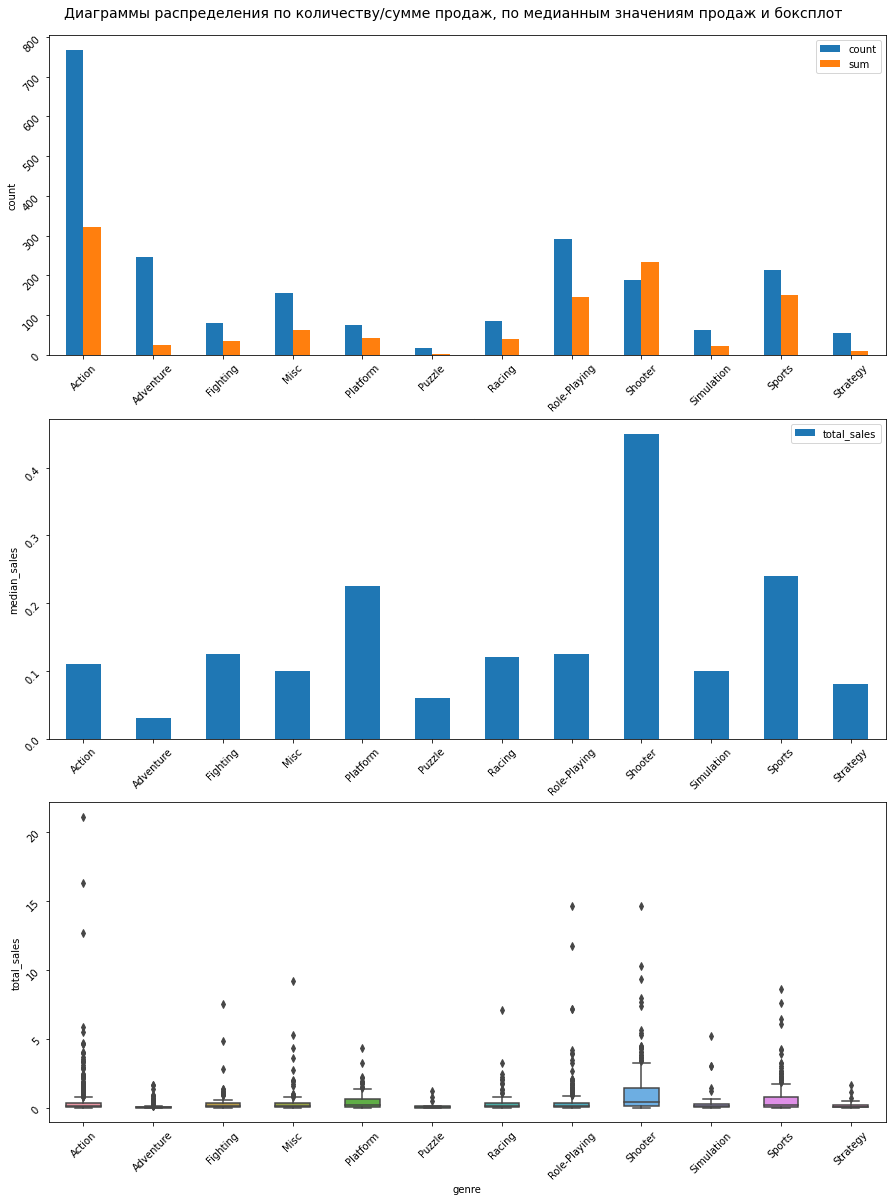

In [72]:
# построим диаграммы распределения по количеству/сумме продаж, по медианным значениям продаж и боксплот
fig, axarr = plt.subplots(3, figsize=(15, 20))

actual_platforms.groupby('genre')['total_sales'].agg(['count', 'sum']).plot.bar(
    ax=axarr[0], legend=True, ylabel='count'
)

actual_platforms.groupby('genre')['total_sales'].median().plot.bar(
    ax=axarr[1], legend=True, ylabel='median_sales'
)

sns.boxplot(x='genre', y='total_sales', data=actual_platforms.sort_values(
    by='genre', ascending=True), width = 0.5, ax=axarr[2])

axarr[0].tick_params(labelrotation=45)
axarr[1].tick_params(labelrotation=45)
axarr[2].tick_params(labelrotation=45)

plt.figtext(0.5,0.9, 'Диаграммы распределения по количеству/сумме продаж, по медианным значениям продаж и боксплот', ha="center", va="top", fontsize=14, color="black")
plt.show()

*На графиках видим, что отдельные игры жанра action продаются очень хорошо, однако в среднем большую прибыль приносят игры жанра шутер, также в тройке спортивные игры и платформеры, наименьший доход приносят игры в жанре приключений*

In [73]:
# посчитаем также конверсию (выручка/тираж) по каждому жанру
conversion_rate = actual_platforms.groupby('genre')['total_sales'].agg(['count', 'sum'])
conversion_rate['conversion'] = conversion_rate['sum'] / conversion_rate['count']
conversion_rate.sort_values(by='conversion', ascending=False).reset_index()

,genre,count,sum,conversion
0,Shooter,187,232.98,1.245882
1,Sports,214,150.65,0.703972
2,Platform,74,42.63,0.576081
3,Role-Playing,292,145.89,0.499623
4,Racing,85,39.89,0.469294
5,Fighting,80,35.31,0.441375
6,Action,766,321.87,0.420196
7,Misc,155,62.82,0.405290
8,Simulation,62,21.76,0.350968
9,Puzzle,17,3.17,0.186471


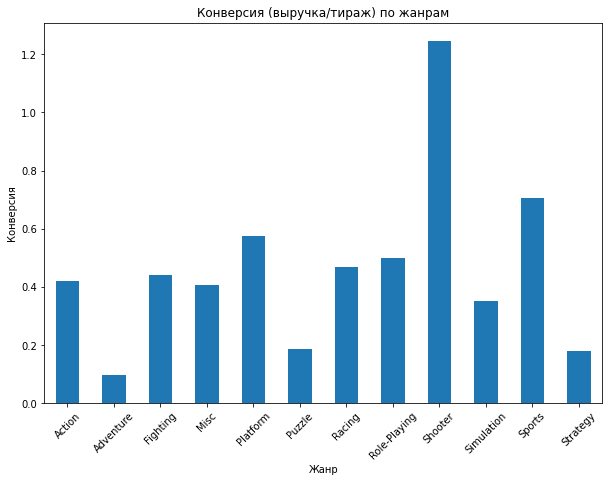

In [74]:
conversion_rate.query('genre != "unknown"').groupby(
    'genre')['conversion'].sum().plot(kind='bar', figsize=(10,7), rot=45)

plt.title('Конверсия (выручка/тираж) по жанрам', fontsize=12)
plt.ylabel('Конверсия')
plt.xlabel('Жанр')
plt.show()

*Лучшая конверсия у шутеров, худшая - у приключений*

## Составим "портрет пользователя" для каждого из регионов

### Определим для пользователя каждого региона самые популярные платформы (топ-5)


In [75]:
def get_sales_per_region_plot(region_sales):
    top_sales = actual_platforms.groupby('platform')[region_sales].agg(['count', 'sum']).sort_values(
        by='count', ascending=False).reset_index().set_index('platform').head(5)
    top_sales.plot(kind='bar', figsize=(8,5), rot=0)
    plt.title(f'Самые популярные платформы {region_sales}', fontsize=12)
    plt.ylabel('Тираж/сумма продаж')
    plt.xlabel('Платформа')
    plt.show()

In [76]:
# посмотрим на распределение топ-5 по продажам по NA региону
na_top_sales = actual_platforms.groupby('platform')['na_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('platform').head(5)

na_top_sales

,count,sum
platform,,
PS4,392,108.74
PSV,358,5.04
PS3,345,63.50
3DS,303,38.20
XOne,247,93.12


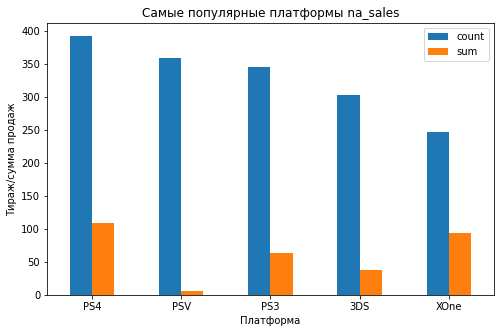

In [77]:
get_sales_per_region_plot('na_sales')

*для каждой платформы выпущено от 250 до примерно 400 игр, по количеству релизов лидирует PS4, по общей прибыли в лидерах PS4 и XOne, при этом на XOne меньше всего релизов*

In [78]:
# посмотрим на конверсию (отношение суммы продаж к количеству релизов) и долю от общего числа продаж среди топ-5 платформ в цифрах и на графиках
na_top_sales['conversion'] = na_top_sales['sum'] / na_top_sales['count']
na_top_sales['share']=na_top_sales['sum']/na_top_sales['sum'].sum()
na_top_sales

,count,sum,conversion,share
platform,,,,
PS4,392,108.74,0.277398,0.352366
PSV,358,5.04,0.014078,0.016332
PS3,345,63.50,0.184058,0.205768
3DS,303,38.20,0.126073,0.123785
XOne,247,93.12,0.377004,0.301750


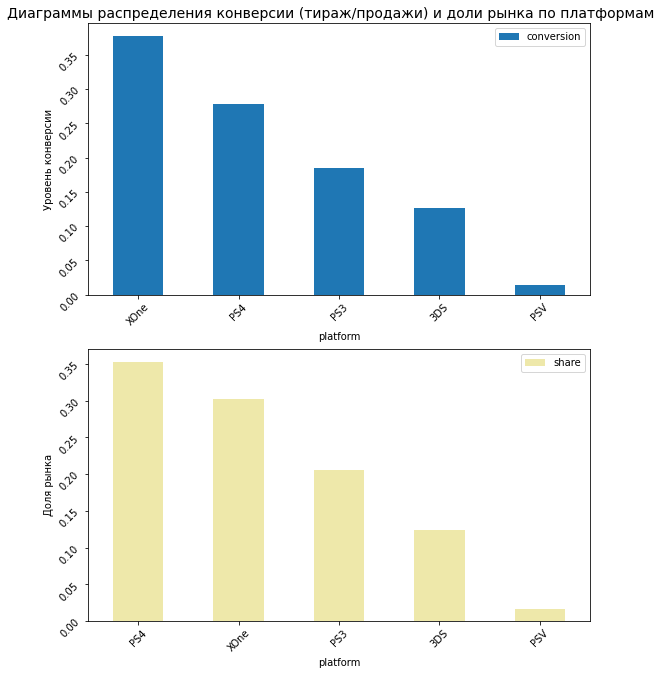

In [79]:
fig, axarr = plt.subplots(2, figsize=(9, 11))

na_top_sales.groupby('platform')['conversion'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[0], legend=True, ylabel = 'Уровень конверсии'
)

na_top_sales.groupby('platform')['share'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[1], legend=True, color='palegoldenrod', ylabel = 'Доля рынка'
)

axarr[0].tick_params(labelrotation=45)
axarr[1].tick_params(labelrotation=45)

plt.figtext(0.5,0.9, 'Диаграммы распределения конверсии (тираж/продажи) и доли рынка по платформам', ha="center", va="top", fontsize=14, color="black")
plt.show()

*Основную часть рынка 65% занимают PS4 и XOne, меньше всего представлена PSV, Сони (PS3+PS4) занимает 55% рынка, соотношение дохода к тиражу лучше у XOne*

In [80]:
# посмотрим на данные по EU 
eu_top_sales = actual_platforms.groupby('platform')['eu_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('platform').head(5)

eu_top_sales

,count,sum
platform,,
PS4,392,141.09
PSV,358,6.10
PS3,345,67.81
3DS,303,30.96
XOne,247,51.59


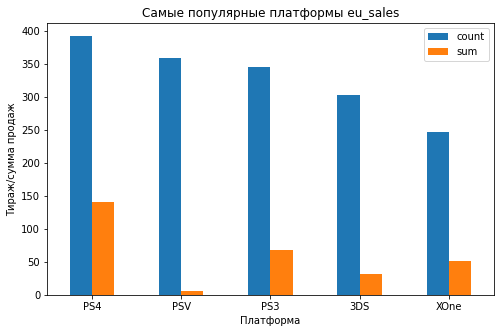

In [81]:
get_sales_per_region_plot('eu_sales')

*Здесь также выпущено от 250 до 400 игр на каждой платформе, в лидерах по тиражу - PS4, в аутсайдерах - XOne, по уровню прибыли лидирует PS4, в аутсайдерах - PSV*

In [82]:
eu_top_sales['conversion'] = eu_top_sales['sum'] / eu_top_sales['count']
eu_top_sales['share']=eu_top_sales['sum']/eu_top_sales['sum'].sum()
eu_top_sales

,count,sum,conversion,share
platform,,,,
PS4,392,141.09,0.359923,0.474172
PSV,358,6.10,0.017039,0.020501
PS3,345,67.81,0.196551,0.227894
3DS,303,30.96,0.102178,0.104050
XOne,247,51.59,0.208866,0.173383


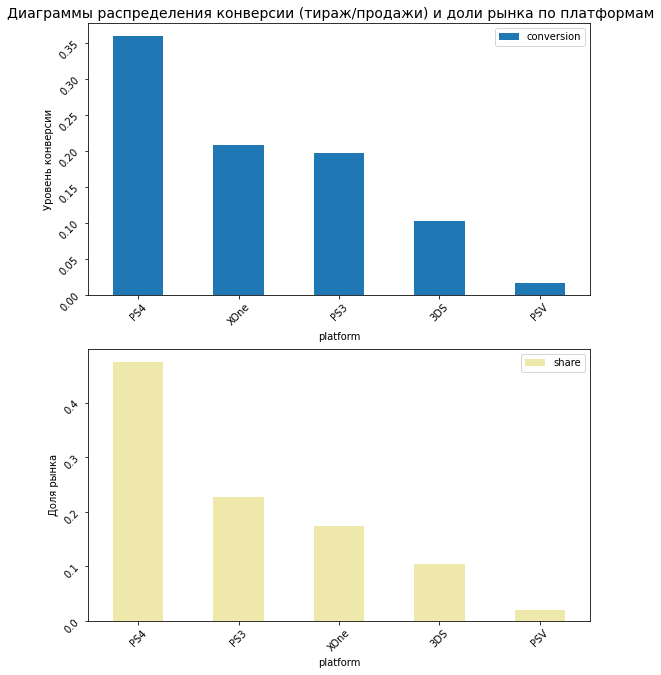

In [83]:
fig, axarr = plt.subplots(2, figsize=(9, 11))

eu_top_sales.groupby('platform')['conversion'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[0], legend=True, ylabel = 'Уровень конверсии'
)

eu_top_sales.groupby('platform')['share'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[1], legend=True, color='palegoldenrod', ylabel = 'Доля рынка'
)

axarr[0].tick_params(labelrotation=45)
axarr[1].tick_params(labelrotation=45)

plt.figtext(0.5,0.9, 'Диаграммы распределения конверсии (тираж/продажи) и доли рынка по платформам', ha="center", va="top", fontsize=14, color="black")
plt.show()

*Почти половину рынка занимают игры для PS4, а если добавить к ним долю PS3, то получится, что Sony занимает 70% рынка EU, соотношение дохода к тиражу лучшее у PS4*

In [84]:
# посмотрим на данные по JP 
jp_top_sales = actual_platforms.groupby('platform')['jp_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('platform').head(5)

jp_top_sales

,count,sum
platform,,
PS4,392,15.96
PSV,358,18.59
PS3,345,23.35
3DS,303,67.81
XOne,247,0.34


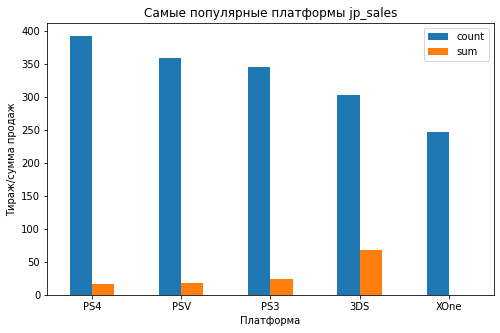

In [85]:
get_sales_per_region_plot('jp_sales')

*Здесь также выпущено от 250 до 400 игр на каждой платформе, в лидерах по тиражу - PS4, в аутсайдерах - XOne, по уровню прибыли лидирует 3DS, в аутсайдерах - XOne*

In [86]:
jp_top_sales['conversion'] = jp_top_sales['sum'] / jp_top_sales['count']
jp_top_sales['share']=jp_top_sales['sum']/jp_top_sales['sum'].sum()
jp_top_sales

,count,sum,conversion,share
platform,,,,
PS4,392,15.96,0.040714,0.126616
PSV,358,18.59,0.051927,0.147481
PS3,345,23.35,0.067681,0.185244
3DS,303,67.81,0.223795,0.537961
XOne,247,0.34,0.001377,0.002697


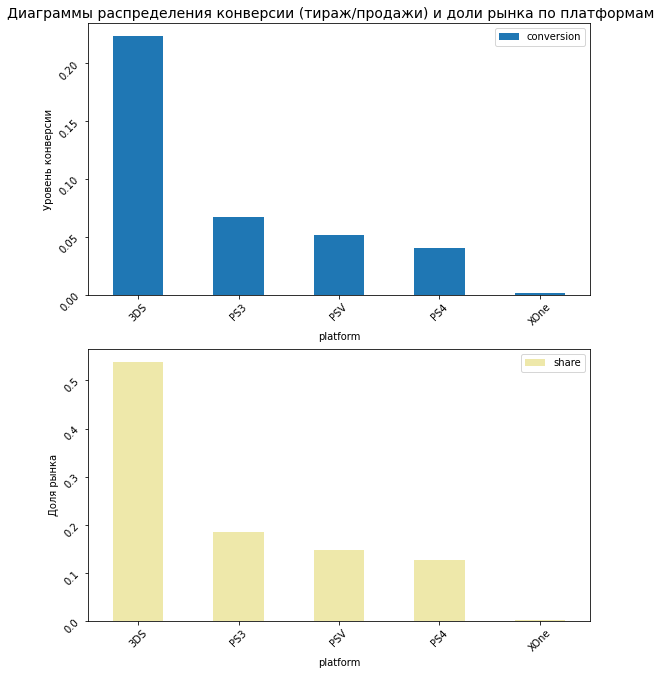

In [87]:
fig, axarr = plt.subplots(2, figsize=(9, 11))

jp_top_sales.groupby('platform')['conversion'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[0], legend=True, ylabel = 'Уровень конверсии'
)

jp_top_sales.groupby('platform')['share'].sum().sort_values(ascending=False).plot.bar(
    ax=axarr[1], legend=True, color='palegoldenrod', ylabel = 'Доля рынка'
)

axarr[0].tick_params(labelrotation=45)
axarr[1].tick_params(labelrotation=45)

plt.figtext(0.5,0.9, 'Диаграммы распределения конверсии (тираж/продажи) и доли рынка по платформам', ha="center", va="top", fontsize=14, color="black")
plt.show()

*Здесь большая часть рынка представлена играми для 3DS, также они имеют лучшие результат по продажам и по соотношению прибыли к тиражу, XOne здесь худшая по популярности и почти не приносит прибыли*

###Самые популярные жанры (топ-5)

In [88]:
#посмотрим NA
na_top_genres = actual_platforms.groupby('genre')['na_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('genre').head(5)

na_top_genres

,count,sum
genre,,
Action,766,126.05
Role-Playing,292,46.40
Adventure,245,7.14
Sports,214,65.27
Shooter,187,109.74


In [89]:
def get_sales_per_genre_plot(region_sales):
    top_sales = actual_platforms.groupby('genre')[region_sales].agg(['count', 'sum']).sort_values(
        by='count', ascending=False).reset_index().set_index('genre').head(5)
    top_sales.plot(kind='bar', figsize=(8,5), rot=0)
    plt.title(f'Самые популярные жанры {region_sales}', fontsize=12)
    plt.ylabel('Тираж/сумма продаж')
    plt.xlabel('Жанр')
    plt.show()

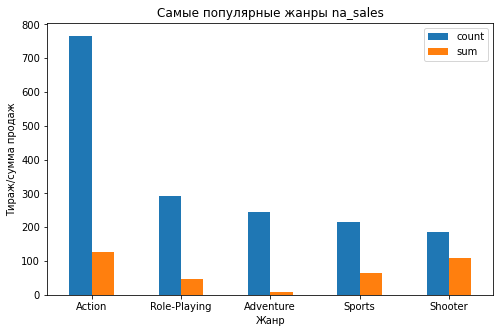

In [90]:
get_sales_per_genre_plot('na_sales')

*В лидерах по тиражу здесь action - более 700 игр, остальные жанры имеют примерно равное распределение по тиражу от 200 до 300 игр, отметим, что наибольшую прибыль приносят жанры action и shooter*

In [91]:
#посмотрим EU
eu_top_genres = actual_platforms.groupby('genre')['eu_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('genre').head(5)

eu_top_genres

,count,sum
genre,,
Action,766,118.13
Role-Playing,292,36.97
Adventure,245,8.25
Sports,214,60.52
Shooter,187,87.86


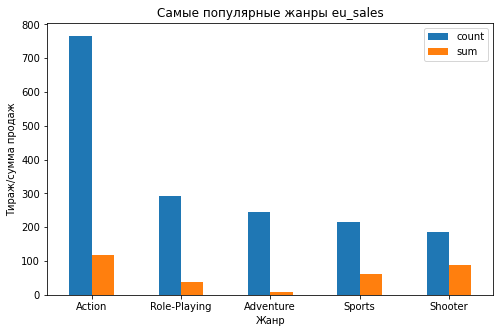

In [92]:
get_sales_per_genre_plot('eu_sales')

*Здесь все похоже на распределение в NA*

In [93]:
# посмотрим JP
jp_top_genres = actual_platforms.groupby('genre')['jp_sales'].agg(['count', 'sum']).sort_values(
    by='count', ascending=False).reset_index().set_index('genre').head(5)
    
jp_top_genres

,count,sum
genre,,
Action,766,40.49
Role-Playing,292,51.04
Adventure,245,5.82
Sports,214,5.41
Shooter,187,6.61


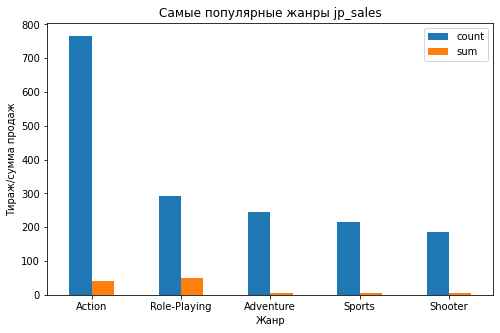

In [94]:
get_sales_per_genre_plot('jp_sales')

*Распределение по тиражу аналогично другим регионам, но здесь выделяется в целом меньшая прибыльность, а наиболее прибыльный жанр - ролевые*

In [95]:
print('Сумма продаж в NA среди топ-5 платформ:', na_top_genres['sum'].sum())
print('Сумма продаж в EU среди топ-5 платформ:', eu_top_genres['sum'].sum())
print('Сумма продаж в JP среди топ-5 платформ:', jp_top_genres['sum'].sum())

Сумма продаж в NA среди топ-5 платформ: 354.59999999999997
Сумма продаж в EU среди топ-5 платформ: 311.73
Сумма продаж в JP среди топ-5 платформ: 109.36999999999999


Дополнительно проиллюстрируем круговой диаграммой

In [96]:
# подготовим данные по платформам
data_na_top = actual_platforms.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
data_na_others = actual_platforms.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na_top.loc['Others'] = data_na_others
data_na_top = data_na_top.to_frame().reset_index()

data_eu_top = actual_platforms.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
data_eu_others = actual_platforms.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
data_eu_top.loc['Others'] = data_eu_others
data_eu_top = data_eu_top.to_frame().reset_index()

data_jp_top = actual_platforms.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
data_jp_others = actual_platforms.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()
data_jp_top.loc['Others'] = data_jp_others
data_jp_top = data_jp_top.to_frame().reset_index()

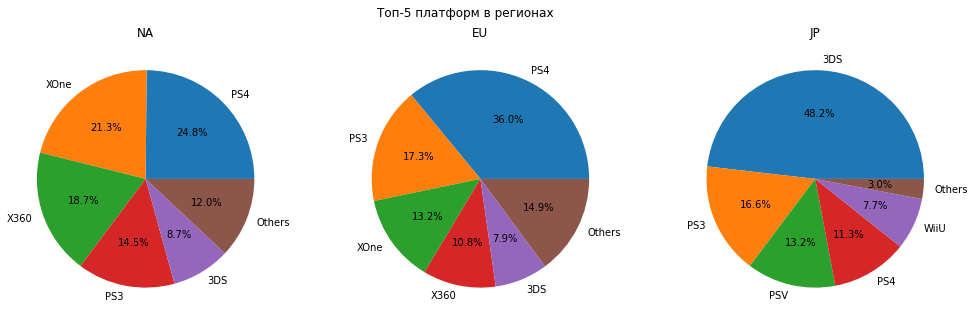

In [97]:
# нарисуем диаграммы
data1 = data_na_top['na_sales']
data2 = data_eu_top['eu_sales']
data3 = data_jp_top['jp_sales']

label1 = list(data_na_top.platform)
label2 = list(data_eu_top.platform)
label3 = list(data_jp_top.platform)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,5))

plt.suptitle("Топ-5 платформ в регионах")
ax1.set_title('NA')
ax2.set_title('EU')
ax3.set_title('JP')

ax1.pie(data1, autopct="%.1f%%", labels=label1)
ax2.pie(data2, autopct="%.1f%%", labels=label2)
ax3.pie(data3, autopct="%.1f%%", labels=label3)

plt.show()

### Определим, влияет ли категория ESRB на продажи в регионе

In [98]:
#посмотрим на распределение в NA
na_rating_impact = actual_platforms.groupby('rating')['na_sales'].agg(['count', 'sum']).sort_values(
    by='sum', ascending=False).reset_index().set_index('rating')

na_rating_impact

,count,sum
rating,,
M,369,165.21
unknown,977,89.42
E,302,79.05
E10+,252,54.24
T,333,49.79


In [99]:
def get_sales_per_esrb_plot(region_sales):
    top_sales = actual_platforms.groupby('rating')[region_sales].agg(['count', 'sum']).sort_values(
        by='sum', ascending=False).reset_index().set_index('rating')
    top_sales.plot(kind='bar', figsize=(8,5), rot=0)
    plt.title(f'Самые популярные категории ESRB {region_sales}', fontsize=12)
    plt.ylabel('Тираж/сумма продаж')
    plt.xlabel('Категория')
    plt.show()

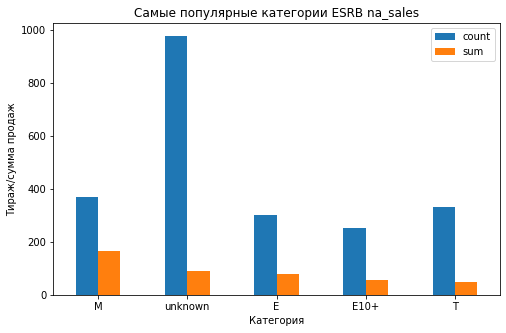

In [100]:
get_sales_per_esrb_plot('na_sales')

*Разброс известных категорий составляет около 100 единиц от 250 до 350, наибольший тираж у пропущенных категорий, из известных лидирует по тиражу и продажам М*

In [101]:
#посмотрим на распределение в EU
eu_rating_impact = actual_platforms.groupby('rating')['eu_sales'].agg(['count', 'sum']).sort_values(
    by='sum', ascending=False).reset_index().set_index('rating')

eu_rating_impact

,count,sum
rating,,
M,369,145.32
E,302,83.36
unknown,977,78.91
E10+,252,42.69
T,333,41.95


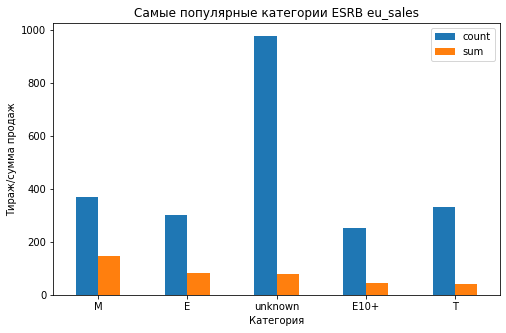

In [102]:
get_sales_per_esrb_plot('eu_sales')

*Видим те же самые цифры по тиражу, зная, что данные категории применяются только для рынка NA, можно предположить, что категории просто скопировались по каждой игре и в другие регионы. Распределение уровня продаж похоже на NA*

In [103]:
#посмотрим на распределение в JP
jp_rating_impact = actual_platforms.groupby('rating')['jp_sales'].agg(['count', 'sum']).sort_values(
    by='sum', ascending=False).reset_index().set_index('rating')

jp_rating_impact

,count,sum
rating,,
unknown,977,85.05
T,333,20.59
E,302,15.14
M,369,14.11
E10+,252,5.89


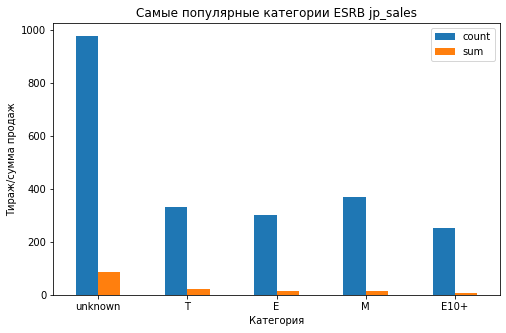

In [104]:
get_sales_per_esrb_plot('jp_sales')

*Видим те же самые цифры по тиражу, зная, что данные категории применяются только для рынка NA, можно предположить, что категории просто скопировались по каждой игре и в другие регионы. Уровень продаж по всем категориям ниже, чем в других регионах*

Резюмируя, можно сказать, что у нас есть 4 очевидных лидера среди рейтингов: Е, Т, М, Е10+. Они распределены похожим образом в разных регионах. Большая схожесть распределений у NA и EU. Однако стоит учитывать, что в данном столбце изначально было 40% пропусков и поэтому по тиражу во всех регионах лидирует неизвестная категория (или категории).

##Проверка гипотез

###Средние пользовательские рейтинги платформ Xbox One и PC равны

Сформулируем гипотезы:

- Н0 = средние пользовательские рейтинги платформ Xbox One и PC равны

- Н1 = средние пользовательские рейтинги платформ Xbox One и PC различаются

Для проверки выберем уровень значимости 5%

Будем использовать метод проверки гипотезы о равенстве средних двух генеральных совокупностей (t-критерий Стьюдента).

In [105]:
# для начала сравним средние из всей имеющейся выборки по каждой платформе, обратим внимание на разницу в размере выборок и убедимся в необходимости проведения стат теста
actual_platforms.query('platform == "XOne" | platform == "PC"').groupby('platform')['user_score'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
platform,,
XOne,182,6.521429
PC,155,6.269677


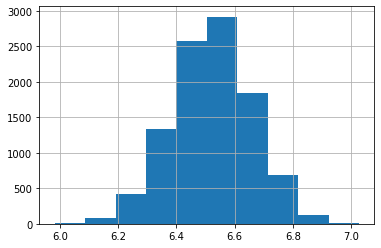

In [106]:
# проверим на нормальность распределения средних из выборок одинакового размера
xone_sample = actual_platforms[actual_platforms['user_score'].notna()] #не смотрим на пропуски в user_score
xone_sample = xone_sample.query('platform == "XOne"')['user_score'] #отфильтруем необходимую платформу
xone_sample = pd.Series([xone_sample.sample(100,replace=True).mean() for _ in range(10000)])
xone_sample.hist()
plt.show()

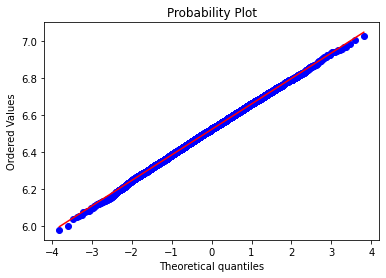

In [107]:
# проверим с помощью qqplot
st.probplot(xone_sample, dist="norm", plot=pylab)
pylab.show()

*Средние распределены нормально*

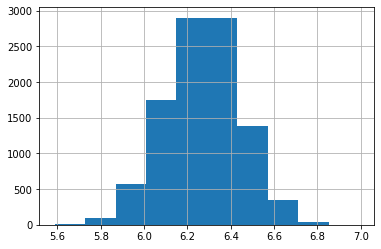

In [108]:
pc_sample = actual_platforms[actual_platforms['user_score'].notna()] # не смотрим на пропуски в user_score
pc_sample = pc_sample.query('platform == "PC"')['user_score'] # отфильтруем необходимую платформу
pc_sample = pd.Series([pc_sample.sample(100,replace=True).mean() for _ in range(10000)])
pc_sample.hist()
plt.show()

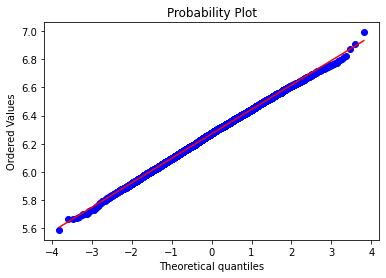

In [109]:
st.probplot(pc_sample, dist="norm", plot=pylab)
pylab.show()

*Средние распределены нормально*

In [110]:
alpha = .05

xone_sample = actual_platforms[actual_platforms['user_score'].notna()] #не смотрим на пропуски в user_score
xone_sample = xone_sample.query('platform == "XOne"')['user_score'] #отфильтруем необходимую платформу

pc_sample = actual_platforms[actual_platforms['user_score'].notna()] #не смотрим на пропуски в user_score
pc_sample = pc_sample.query('platform == "PC"')['user_score'] #отфильтруем необходимую платформу

results = st.ttest_ind(
    xone_sample, 
    pc_sample,
    equal_var = False)

print('p-значение:', format(results.pvalue, '.10f'))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1475959401
Не получилось отвергнуть нулевую гипотезу


Не отвергаем Н0, pval получился больше вероятности ошибки первого рода

А значит, мы ошибочно отвергнем более 14% верных нулевых гипотез

Поэтому считаем, что средние выборок равны

### Средние пользовательские рейтинги жанров Action и Sports различаются

Сформулируем гипотезы:

- Н0 = средние пользовательские рейтинги жанров Action и Sports равны

- Н1 = средние пользовательские рейтинги жанров Action и Sports различаются

Для проверки выберем уровень значимости 5%

Будем использовать метод проверки гипотезы о равенстве средних двух генеральных совокупностей (t-критерий Стьюдента).

In [111]:
# для начала сравним средние из всей имеющейся выборки по каждому жанру, обратим внимание на разницу в размере выборок и убедимся в необходимости проведения стат теста
actual_platforms.query('genre == "Action" | genre == "Sports"').groupby('genre')['user_score'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
genre,,
Action,389,6.837532
Sports,160,5.238125


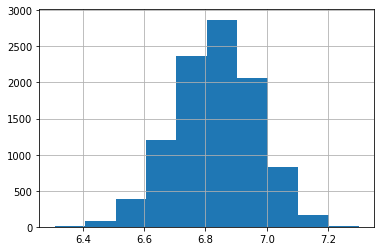

In [112]:
# проверим на нормальность распределения средних из выборок одинакового размера
action_sample = actual_platforms[actual_platforms['user_score'].notna()] # не смотрим на пропуски в user_score
action_sample = action_sample.query('genre == "Action"')['user_score'] # отфильтруем необходыимый жанр
action_sample = pd.Series([action_sample.sample(100,replace=True).mean() for _ in range(10000)])
action_sample.hist()
plt.show()

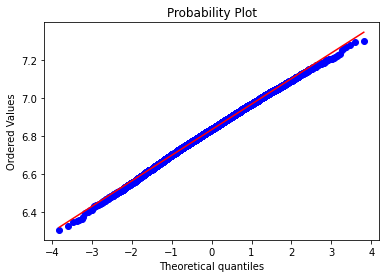

In [113]:
st.probplot(action_sample, dist="norm", plot=pylab)
pylab.show()

*Средние распределены нормально*

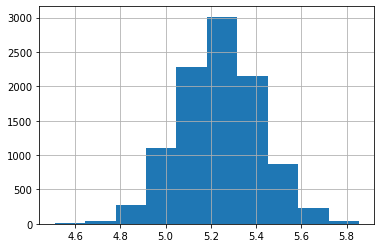

In [114]:
sports_sample = actual_platforms[actual_platforms['user_score'].notna()] # не смотрим на пропуски в user_score
sports_sample = sports_sample.query('genre == "Sports"')['user_score'] # отфильтруем необходыимый жанр
sports_sample = pd.Series([sports_sample.sample(100,replace=True).mean() for _ in range(10000)])
sports_sample.hist()
plt.show()

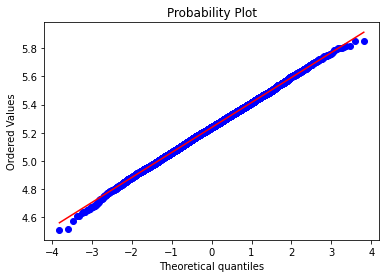

In [115]:
st.probplot(sports_sample, dist="norm", plot=pylab)
pylab.show()

*Средние распределены нормально*

In [116]:
alpha = .05

action_sample = actual_platforms[actual_platforms['user_score'].notna()] # не смотрим на пропуски в user_score
action_sample = action_sample.query('genre == "Action"')['user_score'] # отфильтруем необходыимый жанр

sports_sample = actual_platforms[actual_platforms['user_score'].notna()] # не смотрим на пропуски в user_score
sports_sample = sports_sample.query('genre == "Sports"')['user_score'] # отфильтруем необходыимый жанр


results = st.ttest_ind(
    action_sample, 
    sports_sample,
    equal_var = False)

print('p-значение:', format(results.pvalue, '.10f'))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0000000000
Отвергаем нулевую гипотезу


Отвергаем Н0, вероятность совершить ошибку первого рода почти 0,

А значит, считаем, что средние различаются

##Общий вывод

На основе проведенного анализа можно сделать следующие выводы:
- начало развития игровой индустрии приходится на 1994-1995гг
- с 2012г наблюдается заметный спад количества продаж по всем платформам
- пиковые показатели продаж в индустрии наблюдались в 2008-2009гг, что можно объяснить появлением революционных к тому моменту консолей X360 и PS3 в 2205-2006гг
- для топ-5 платформ по продажам за все время характерен похожий цикл развития - актуальность каждой платформы составляет примерно 3-5 лет (срок от начала роста до начала падения релизов)
- для платформ с 6 по 10 по уровню продаж характерен аналогичный цикл с поправкой на количество продаж
- стоит отметить, что РС остается примерно на одном уровне популярности весь период наблюдений
- для более старых платформ характерен меньший "цикл жизни" - примерно 2-3 года
- для составления прогноза на 2017г в качестве актуального периода будем использовать 2013-2016, поскольку мы выяснили, что "цикл жизни" среди топовых платформ составляет до 5 лет, в результате анализа платформ за актальный период мы установили:
> * лидером по продажам с 2013 года является PS4
> * за 2016 также в топ-3 входят 3DS и XOne
> * продажи на всех платформах снижаются
> * продажи для PSP закончились в 2015
> * продажи для X360 и PS3 начали снижаться еще до 2013 ввиду выхода новых платформ XOne и PS4 у Майкрософт и Сони соответственно
> * продажи для 3DS равномерно снижались до 2015, после чего выровнялись
> * прогноз на 2017: лидеры по продажам за актуальный период подходят к концу своего цикла популярности и вскоре производители должны обновить модельный ряд. До выхода новых платформ в лидерах останутся платформы PS4, XOne с нисходящим уровнем продаж
- рекордсменом по продажам является игра Wii Sports на платформе Wii, принесшая более 82млн
- видим, что есть отдельные игры, которые приносят бОльшую прибыль на каждой платформе
- игры на РС выходят большим тиражом, но приносят меньше прибыли в сравнении с играми на приставках, выпущенными аналогичным тиражом
- за актуальный период 2/8 платформ имеют доходность с 99% игр менее 500тыс, остальные больше этого порога, лучшие по этому показателю: PS3 и PS4, но у PS4 значительно меньший тираж, ввиду этого, делаем вывод, что доходность с каждой игры там выше и **с этой точки зрения выбор стоит сделать в пользу PS4 и PS3**
- проанализировав зависимости продаж от оценок критиков и игроков PS4, **мы установили прямую зависимость уровня продаж от оценок критиков, но данная зависимость проявляется только с высокорейтинговыми играми - можно сказать, что рост продаж начинается с оценок от 63. Что касается зависимости продаж от рейтинга игроков, то здесь прямой зависимости не прослеживается**
- **о PS3 можно сделать аналогичные выводы, как и по PS4**.
- **о XOne можно сделать аналогичные выводы, как и по PS4**.
- мы установили, что отдельные игры жанра action продаются очень хорошо, однако в среднем большую прибыль приносят игры жанра шутер, также в тройке спортивные игры и платформеры, наименьший доход приносят игры в жанре приключений. **С точки зрения жанра стоит выбрать шутеры и спорт**
- в результате анализа топ-5 платформ по продажам за весь период наблюдений по региону NA установлено, что:
> * для каждой платформы выпущено от 250 до примерно 400 игр, по количеству релизов лидирует **PS4**, по общей прибыли в лидерах **PS4 и XOne**, при этом на XOne меньше всего релизов
> * основную часть рынка 65% занимают PS4 и XOne, меньше всего представлена PSV, Сони (PS3+PS4) занимает 55% рынка, соотношение дохода к тиражу лучше у XOne
- в результате анализа топ-5 платформ по продажам за весь период наблюдений по региону EU установлено, что:
> * здесь также выпущено от 250 до 400 игр на каждой платформе, в лидерах по тиражу - **PS4**, в аутсайдерах - **XOne**, по уровню прибыли лидирует **PS4**, в аутсайдерах - **PSV**
> * почти половину рынка занимают игры для PS4, а если добавить к ним долю PS3, то получится, что Sony занимает 70% рынка EU, соотношение дохода к тиражу лучшее у PS4
- в результате анализа топ-5 платформ по продажам за весь период наблюдений по региону JP установлено, что:
> * здесь также выпущено от 250 до 400 игр на каждой платформе, в лидерах по тиражу - **PS4**, в аутсайдерах - **XOne**, по уровню прибыли лидирует **3DS**, в аутсайдерах - **XOne**
> * здесь большая часть рынка представлена играми для 3DS, также они имеют лучшие результат по продажам и по соотношению прибыли к тиражу, **XOne** здесь худшая по популярности и почти не приносит прибыли
- в результате анализа топ-5 жанров по продажам за весь период наблюдений по региону NA установлено, что:
> * в лидерах по тиражу здесь **action** - более 700 игр, остальные жанры имеют примерно равное распределение по тиражу от 200 до 300 игр, отметим, что наибольшую прибыль приносят жанры **action и shooter**
- в результате анализа топ-5 жанров по продажам за весь период наблюдений по региону EU установлено, что:
> * в лидерах по тиражу здесь **action** - более 700 игр, остальные жанры имеют примерно равное распределение по тиражу от 200 до 300 игр, отметим, что наибольшую прибыль приносят жанры **action и shooter**
- в результате анализа топ-5 жанров по продажам за весь период наблюдений по региону JP установлено, что:
> * аспределение по тиражу аналогично другим регионам, но здесь выделяется в целом меньшая прибыльность, а наиболее прибыльные жанры - **ролевые** и **action**, в шутеры почти никто не играет
- в результате анализа возрастных категорий по продажам за весь период наблюдений по региону NA установлено, что:
> * разброс известных категорий составляет около 100 единиц от 250 до 350, наибольший тираж у игр с неуказанной категорией, из известных лидирует по тиражу и продажам **М**
- в результате анализа возрастных категорий по продажам за весь период наблюдений по региону EU установлено, что:
> * здесь те же самые цифры по тиражу, зная, что данные категории применяются только для рынка NA, можно предположить, что категории просто скопировались по каждой игре и в другие регионы. Распределение уровня продаж похоже на NA, т.е. в лидерах **М**
- в результате анализа возрастных категорий по продажам за весь период наблюдений по региону JP установлено, что:
> * здесь те же самые цифры по тиражу, зная, что данные категории применяются только для рынка NA, можно предположить, что категории просто скопировались по каждой игре и в другие регионы. Уровень продаж по всем категориям ниже, чем в других регионах
- резюмируя, можно сказать, что у нас есть 4 очевидных лидера среди рейтингов: Е, Т, М, Е10+. Они распределены похожим образом в разных регионах. Большая схожесть распределений у NA и EU. Однако стоит учесть, что 40% данных из этого столбца отсутствовала.
- проверка гипотез показала, что:
> * средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**
> * средние пользовательские рейтинги жанров Action и Sports **различаются**


Резюмируя, можно сделать вывод, что наиболее перспективной платформой на 2017 год является PS4 - для NA, EU, в JP также стоит обратить внимание на 3DS, т.к. они лучше продаются.
Не стоит принимать решение на основе рейтинга игроков, поскольку зависимости продаж от оценок не прослеживается. Имеет смысл обращать внимание на оценки критиков примерно от 63 и выше - от этого уровня идет линейный рост продаж.
На рынке NA стоит обратить внимание на шутеры (у них небольшой тираж, но они продаются на уровне топ-2), а также, на экшн (самый большой тираж и топ-1 по продажам).
Аналогично на рынке EU.
На рынке JP стоит обратить внимание на ролевые (у них топ-1 продажи и топ-2 по тиражу), можно также на экшн (топ-2 продажи и топ-1 по тиражу)
Касаемо рейтинга ESRB для NA рынка стоит обратить внимание на игры М (топ-1 по продажам).